# Analysis of Lending club loan dataset

In [6]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import datetime

#### Plotting with seaborn

In [8]:
import seaborn as sns
sns.set_style("white")
plt.rcParams["figure.figsize"] = (12, 6)

### Helper functions 

In [26]:
def get_col_info(data_col):
    """
    data_col  - a column from the dataframe
    """
    description = data_col.describe()
    missing_vals = np.count_nonzero(data_col.isnull())
    print(description)
    print("Total Missing values = {0}".format(missing_vals))
    return None
    
def plot_categorical_counts(data, **kwargs):
    """
    For categorical variables, get an idea of how the data is split
    """
    sns.countplot(data,**kwargs)

## Exploration of the data

### Data dictionary 

In [10]:
df_dict = pd.read_excel('../data/LCDataDictionary.xlsx')

In [11]:
df_dict.shape

(80, 2)

#### Set formatting options for pandas

In [12]:
pd.set_option('display.max_colwidth', -1)

In [13]:
pd.options.display.max_rows = 100
pd.set_option('precision', 5)

#### What's in the data?

In [14]:
df_dict

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


#### Thoughts

If I am trying to predict interest rate that the loan will be offered - then I need to be careful with only including the data that would be there at the acquisition stage. There should be no data that is date after the issue_d at the very least



### Exploring the data

In [15]:
df_loan = pd.read_csv('../data/loan.csv',low_memory=False)

In [16]:
df_loan.shape

(887379, 74)

In [55]:
df_loan.columns.sort_values()

Index(['acc_now_delinq', 'addr_state', 'all_util', 'annual_inc',
       'annual_inc_joint', 'application_type', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'desc', 'dti', 'dti_joint',
       'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util',
       'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'max_bal_bc', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record',
       'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc', 'open_acc_6m',
       'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m',
       'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade'

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Verified status joint is the same as verification status joint - let's rename this field

In [19]:
df_loan.rename(index=str, columns={"verification_status_joint":"verified_status_joint",
                                   "total_rev_hi_lim":"total_rev_hi_lim"},inplace=True)

### Sample down to 30000 rows

In [57]:
sample_loan_df = df_loan.sample(n=30000)

In [58]:
sample_loan_df.shape

(30000, 74)

#### Mismatch between data dictionary and loan file features?

In [61]:
df_dict[~df_dict['LoanStatNew'].isin(df_loan.columns)]

,LoanStatNew,Description
13,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
14,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
24,is_inc_v,"Indicates if income was verified by LC, not verified, or if the income source was verified"
27,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
28,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
71,total_rev_hi_lim,Total revolving high credit/credit limit
78,NaN,NaN
79,NaN,* Employer Title replaces Employer Name for all loans listed after 9/23/2013



#### Missing FICO scores in loan data

If I am looking to predict interest rates charged, then FICO ranges is probably quite important - but let's see what can be done in the absence of FICO

#### Issue and credit pulled dates

In [ ]:
df_loan['issue_d'].head()

In [ ]:
df_loan['issue_d'].value_counts().head()

In [23]:
df_loan['issue_d'] = df_loan['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%b-%Y'))

In [24]:
df_loan['issue_d'].value_counts().head()

2015-10-01    48631
2015-07-01    45962
2015-12-01    44342
2014-10-01    38782
2015-11-01    37530
Name: issue_d, dtype: int64

In [27]:
get_col_info(df_loan['last_credit_pull_d'])

count     887326  
unique    103     
top       Jan-2016
freq      730574  
Name: last_credit_pull_d, dtype: object
Total Missing values = 53


In [28]:
df_loan['last_credit_pull_d'].value_counts().head()

Jan-2016    730574
Dec-2015    19308 
Nov-2015    11490 
Oct-2015    10419 
Sep-2015    10087 
Name: last_credit_pull_d, dtype: int64

In [29]:
def replace_non_null_dates(x):
    """
    x is a string formatted date such as Sep-2015
    """
    if x == np.nan:
        return x
    else:
        return datetime.datetime.strptime(str(x),'%b-%Y')

In [30]:
df_loan['last_credit_pull_d'].fillna('Jan-1900',inplace=True)

In [31]:
df_loan['last_credit_pull_d'] = df_loan['last_credit_pull_d'].apply(lambda x: replace_non_null_dates(x))

In [32]:
df_loan['last_credit_pull_d'].value_counts().head()

2016-01-01    730574
2015-12-01    19308 
2015-11-01    11490 
2015-10-01    10419 
2015-09-01    10087 
Name: last_credit_pull_d, dtype: int64

In [38]:
len(df_loan[df_loan['last_credit_pull_d']=='1900-01-01'].index)

53

In [41]:
df_loan[(df_loan['issue_d'] > df_loan['last_credit_pull_d'])& (df_loan['last_credit_pull_d'] != '1900-01-01')][['issue_d','last_credit_pull_d']].count()

issue_d               707
last_credit_pull_d    707
dtype: int64

Most of the credit pulls are after the issue date - not much use of this field either

### Initial thoughts

What is the problem that I am trying to solve here? I want to see if I can predict the interest rate a customer will get at Lending club with only data available at the applicatoin stage. 

Lending club already has information on their rates here - https://www.lendingclub.com/public/rates-and-fees.action 

![Grades chart](./images/Grades.png)



On the website if you go through the process, they ask you for your credit score, amount of loan and what you want this for. 

Then they ask you for your address etc and do a soft credit pull. The FICO score is a big part of the interest rate. 

Can I reverse engineer the interest rate/loan grade without the FICO score? There are other datasets out there that contain the FICO score with the same lending club data

#### What are the features that are available at application stage? 

From list of features:

|Feature           |Available?|Notes                                          |
|------------------|----------|-----------------------------------------------|
| 'addr_state'     | Y        |                                               |
|acc_now_delinq  | N | Post app
| 'all_util' | N |  this is probably current from credit report and will not be available
|'annual_inc'| Y |
|'annual_inc_joint'| Y |
|'application_type'| Y |
|'collection_recovery_fee'| N |  contains post app info
|'collections_12_mths_ex_med'| N | contains post app info
|'delinq_2yrs'| N | Post app
|'desc' | Y | although this is a free form text entry, I believe
|'dti' | Y? |  Available and most likely important (from credit bureau pull? - post app?)
|'dti_joint'| Y |   Available and most likely important (from credit bureau pull? - post app?)
|'earliest_cr_line'| Y | From rumours, very important
|'emp_length'| Y | Might be important? 
|'emp_title'| Y | Not sure how to use this
|'funded_amnt'| N | Post app
|'funded_amnt_inv'| N |Post app
|'grade'| N | Target variable 
|'home_ownership'| Y |Categorical (potentially useful?) 
|'id'| Y | Lending club issued id - Should not matter
|'il_util'| N | Ratio of util to current balance
|'initial_list_status'| Y | not sure what to make of this
|'inq_fi'| N?  | Personal finance inquiries includes post app
|'inq_last_12m'| N | Post app
|'inq_last_6mths'| N | Post app
|'installment' | Y? | When is this decided? 
|'int_rate'| N | Target variable 
|'issue_d'| Y | Issue date
|'last_credit_pull_d'| N | Post app
|'last_pymnt_amnt'| N | Post app
|'last_pymnt_d'| N | Post ap
|'loan_amnt' | Y | Important
|'loan_status'| N | Current loan status
|'max_bal_bc' | N | Maximum current balance
|'member_id' | Y | Lending club provided
|'mths_since_last_delinq' | N | Too current
|'mths_since_last_major_derog' | N ? | After issue? 
|'mths_since_last_record' | N? | What is a public record? 
|'mths_since_rcnt_il', | N? | Months since recent installment account
|'next_pymnt_d'| N | next pyament date
|'open_acc'| N | Status of account
|'open_acc_6m' | N | open acct months ago
|'open_il_12m'| N | Open installment accounts 12 months ago
|'open_il_24m'| N | Number of  installment accounts opened 24 months
|'open_il_6m' | N | Number of  installment accounts Open 6 months
|'open_rv_12m'| N | Number of revolving trades opened 12 months
|'open_rv_24m'| N | Number of revolving trades opned in 24 months
|'out_prncp' | N | Remaining outstanding principal for total amount funded
|out_prncp_inv|	N | Remaining outstanding principal for portion of total amount funded by investors
|'policy_code' | Y? | publicly available policy_code=1\nnew products not publicly available policy_code=2
|'pub_rec' | Y ? | Number of derogatory public records
|'purpose' | Y | Purpose of loan
|'pymnt_plan'| N | Post default?  - Indicates if a payment plan has been put in place for the loan
|'recoveries' | N | Post charge off recoveries
|'revol_bal' | Y? | Total credit revolving balance
|'revol_util'| Y? | Total utilization that is revolved
|'sub_grade' | N | related to grade
|'term' | Y | Number of installments?  either 36m or 60 months
|'title' | Y | Should not matter
|'tot_coll_amt' | N | post app Total collection amounts ever owed
|'tot_cur_bal'| N  | Post app Total current balance of all accounts
|'total_acc' | Y? | The total number of credit lines currently in the borrower's credit file - does this include the LC loan? 
|'total_bal_il'| N | Total current balance of all installment accounts
|'total_cu_tl' | Y? | 	Number of finance trades
|'total_pymnt'| N | Total payment
|'total_pymnt_inv' | N | total payment to investors
|'total_rec_int' | N | post app received interest
|'total_rec_late_fee'| N | Post app received late fee
|'total_rec_prncp' | N | POst app received principal
|'total_rev_hi_lim' | Y? | Total revolving high credit/credit limit
|'url' | Y | WOuld not matter
|'verification_status' | Y | Potentially useful
|'verification_status_joint' | Y | Potentially useful
|'zip_code'| Y | Useful? 

### Drop the definitely post app features

In [64]:
future_imports = ['acc_now_delinq','collection_recovery_fee','collections_12_mths_ex_med', 
                  'funded_amnt','funded_amnt_inv','inq_fi','inq_last_12m','inq_last_6mths',
                  'last_credit_pull_d','last_pymnt_amnt','last_pymnt_d',
                  'loan_status','max_bal_bc','mths_since_last_delinq',
                  'mths_since_last_major_derog','mths_since_last_record',
                  'mths_since_rcnt_il','next_pymnt_d','open_acc','open_acc_6m',
                  'open_il_12m','open_il_24m','open_il_6m','open_rv_12m','open_rv_24m',
                  'out_prncp' ,'out_prncp_inv','pymnt_plan','recoveries','sub_grade',
                  'tot_coll_amt','tot_cur_bal','total_bal_il','total_cu_tl',
                  'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
                  'total_rec_prncp']

In [65]:
df_loan_app = sample_loan_df.drop(labels=future_imports, axis=1)

In [66]:
df_loan_app.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verified_status_joint', 'il_util',
       'all_util', 'total_rev_hi_lim'],
      dtype='object')

In [67]:
df_loan_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 594037 to 398874
Data columns (total 35 columns):
id                       30000 non-null int64
member_id                30000 non-null int64
loan_amnt                30000 non-null float64
term                     30000 non-null object
int_rate                 30000 non-null float64
installment              30000 non-null float64
grade                    30000 non-null object
emp_title                28245 non-null object
emp_length               30000 non-null object
home_ownership           30000 non-null object
annual_inc               30000 non-null float64
verification_status      30000 non-null object
issue_d                  30000 non-null datetime64[ns]
url                      30000 non-null object
desc                     4247 non-null object
purpose                  30000 non-null object
title                    29994 non-null object
zip_code                 30000 non-null object
addr_state               30000 non-

### Let's look at the various features

#### Loan amounts

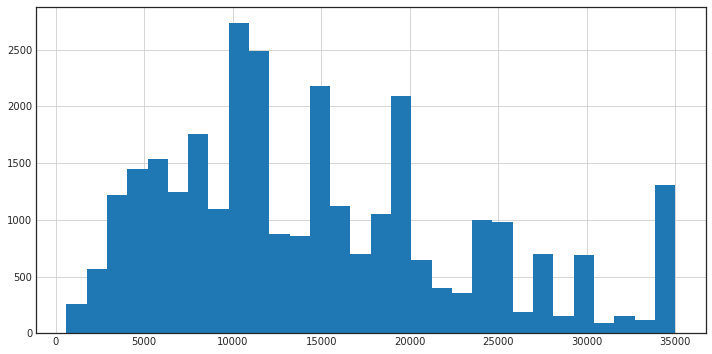

In [69]:
df_loan_app['loan_amnt'].hist(bins=30)

People like to ask for round numbers - 10000, 15000, and 20000 seem to be the most requested loans. 

#### Where are the loan applicants from?

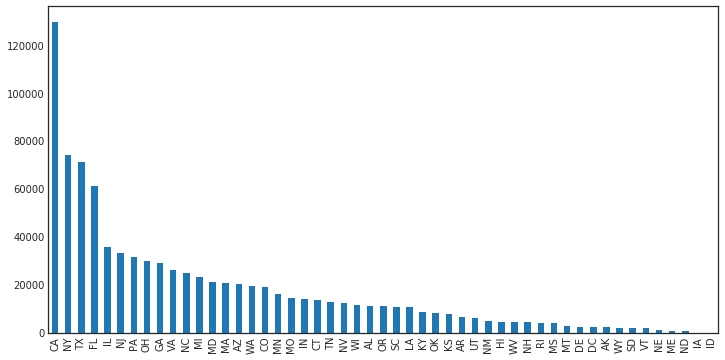

In [46]:
df_loan_app['addr_state'].sort_values().value_counts().plot(kind='bar', figsize=(12,6))

In [133]:
df_loan_app['addr_state'].describe()

count     887379
unique    51    
top       CA    
freq      129517
Name: addr_state, dtype: object

Mostly from California and NY, Texas, Florida and then kinda drops off. No missing values

#### What about the utilization? 

In [134]:
get_col_info(data_col=df_loan_app['all_util'])

count    21372.00000
mean     60.83194   
std      20.01325   
min      0.00000    
25%      47.70000   
50%      61.90000   
75%      75.20000   
max      151.40000  
Name: all_util, dtype: float64
Total Missing values = 866007


A lot of missing values here - only 21372 out of 887379 are available. Might need to drop this column from any modeling problems. What else can I do for these missing values? 

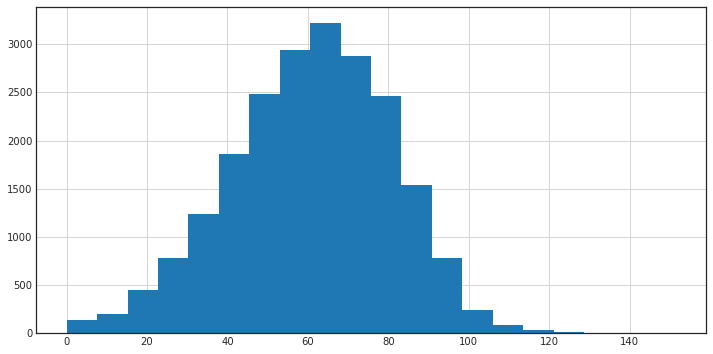

In [61]:
df_loan['all_util'].hist(bins=20)

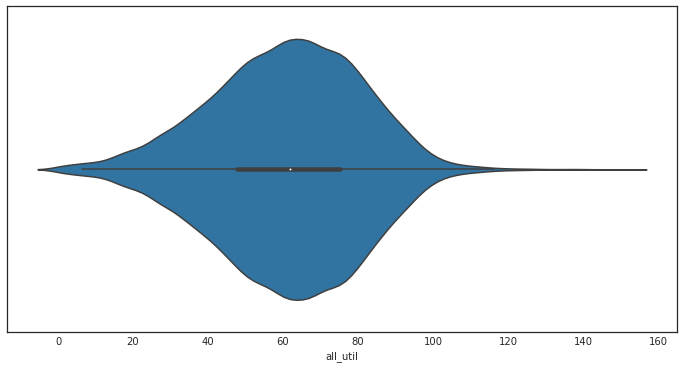

In [63]:
sns.violinplot(x=df_loan['all_util'].dropna())

#### Annual income

In [136]:
get_col_info(df_loan_app['annual_inc'])

count    8.87375e+05
mean     7.50276e+04
std      6.46983e+04
min      0.00000e+00
25%      4.50000e+04
50%      6.50000e+04
75%      9.00000e+04
max      9.50000e+06
Name: annual_inc, dtype: float64
Total Missing values = 4


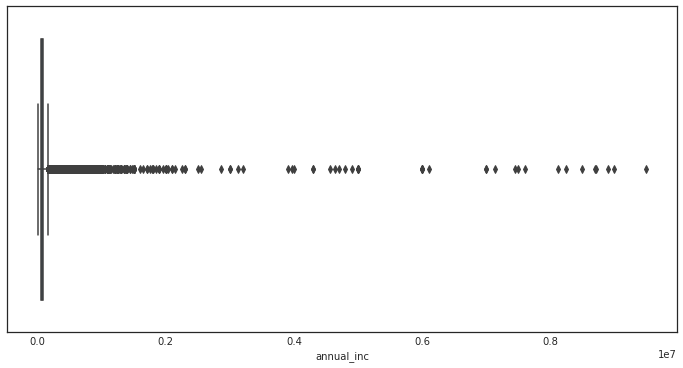

In [24]:
sns.boxplot(x=df_loan["annual_inc"].dropna())

Outliers - will need to transform this feature. A log should probably be a good enough transformation

#### Annual income joint

In [137]:
get_col_info(df_loan_app['annual_inc_joint'])

count    511.00000   
mean     109981.01159
std      52730.37985 
min      17950.00000 
25%      76032.50000 
50%      101771.00000
75%      132800.00000
max      500000.00000
Name: annual_inc_joint, dtype: float64
Total Missing values = 886868


Lots of missing values - most applicants are not applying with anyone else? 

#### Application type

In [138]:
get_col_info(df_loan_app['application_type'])

count     887379    
unique    2         
top       INDIVIDUAL
freq      886868    
Name: application_type, dtype: object
Total Missing values = 0


In [139]:
df_loan_app['application_type'].value_counts()

INDIVIDUAL    886868
JOINT         511   
Name: application_type, dtype: int64

As expected from joint income, only 511 applications are applying together

#### Drop joint applications - and related columns 

In [70]:
df_loan_app.drop(df_loan_app[df_loan_app['application_type']=='JOINT'].index, inplace=True)

In [71]:
df_loan_app['application_type'].value_counts()

INDIVIDUAL    29984
Name: application_type, dtype: int64

Joint application columns

In [72]:
joint_cols = ['dti_joint', 'verified_status_joint', 'annual_inc_joint']

In [73]:
df_loan_app.drop(labels=joint_cols,axis=1, inplace=True)

In [74]:
df_loan_app.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'application_type', 'il_util',
       'all_util', 'total_rev_hi_lim'],
      dtype='object')

#### Delinquency 2 years

In [37]:
get_col_info(df_loan['delinq_2yrs'])

count    887350.00000
mean     0.31444     
std      0.86224     
min      0.00000     
25%      0.00000     
50%      0.00000     
75%      0.00000     
max      39.00000    
Name: delinq_2yrs, dtype: float64
Total Missing values = 29


In [89]:
sample_loan_df['days b/w pull and issue'] = (sample_loan_df['last_credit_pull_d'] - sample_loan_df['issue_d']).dt.days

In [93]:
sample_loan_df['days b/w pull and issue'].describe()

count    30000.00000
mean     468.69163  
std      519.21455  
min     -41669.00000
25%      184.00000  
50%      365.00000  
75%      671.00000  
max      3014.00000 
Name: days b/w pull and issue, dtype: float64

If I am trying to predict interest/default status - can I use this? 
This feels like it will have data from post app

#### Installment

In [145]:
get_col_info(df_loan_app['installment'])

count    886868.00000
mean     436.65293   
std      244.16397   
min      15.67000    
25%      260.60000   
50%      382.55000   
75%      572.47000   
max      1445.46000  
Name: installment, dtype: float64
Total Missing values = 0


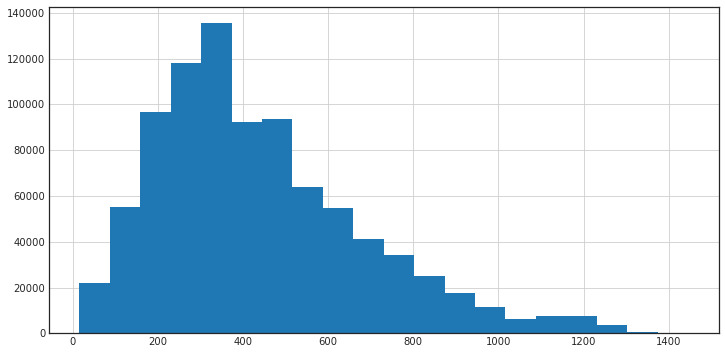

In [152]:
df_loan_app['installment'].hist(bins=20)

Most people are paying under 500$ a month

#### Terms - LC only offers 36m and 60m? 

In [153]:
get_col_info(df_loan_app['term'])

count     886868    
unique    2         
top        36 months
freq      620886    
Name: term, dtype: object
Total Missing values = 0


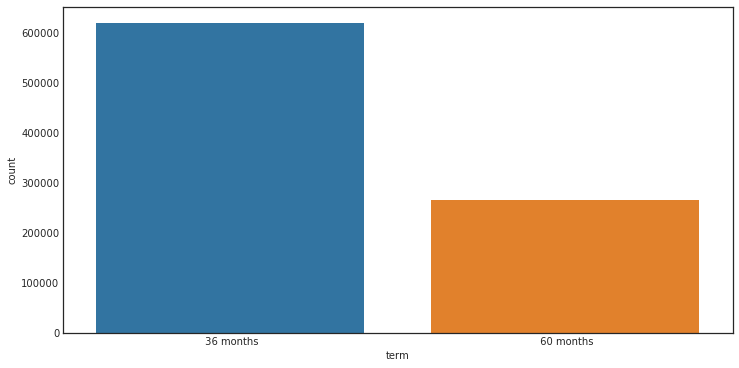

In [154]:
sns.countplot(df_loan_app['term'])

#### Home ownership

#### Employment length

In [157]:
get_col_info(df_loan_app['emp_length'])

count     886868   
unique    12       
top       10+ years
freq      291403   
Name: emp_length, dtype: object
Total Missing values = 0


In [159]:
df_loan_app['emp_length'].value_counts()

10+ years    291403
2 years      78833 
< 1 year     70559 
3 years      69994 
1 year       57064 
5 years      55686 
4 years      52496 
n/a          44764 
7 years      44576 
8 years      43930 
6 years      42928 
9 years      34635 
Name: emp_length, dtype: int64

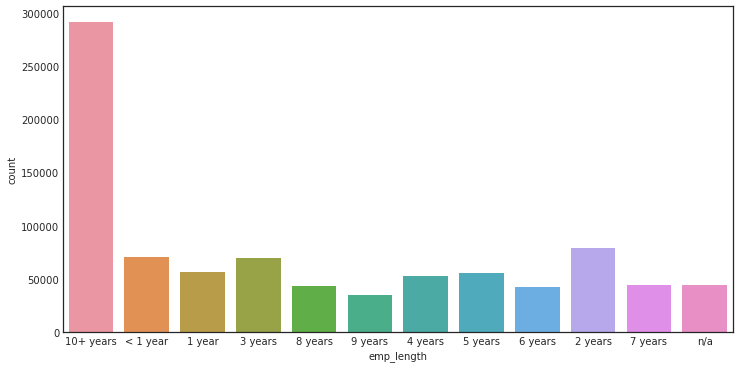

In [158]:
sns.countplot(df_loan_app['emp_length'])

What does n/a mean in this case? How do I treat it? 

#### 

#### Policy code

In [46]:
get_col_info(df_loan, 'policy_code')

count    887379.0
mean     1.0     
std      0.0     
min      1.0     
25%      1.0     
50%      1.0     
75%      1.0     
max      1.0     
Name: policy_code, dtype: float64
Total Missing values = 0


No variation at all - drop

In [47]:
df_loan_app.drop(labels=['policy_code'],axis=1, inplace=True)

#### Grade and interest - the targets 

In [48]:
get_col_info(df_loan,'grade')

count     887379
unique    7     
top       B     
freq      254535
Name: grade, dtype: object
Total Missing values = 0


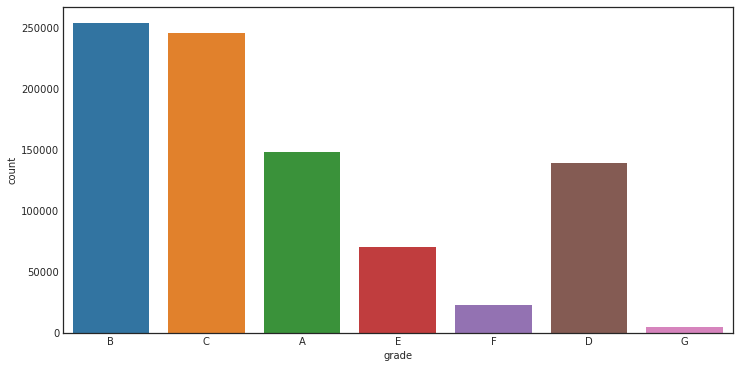

In [49]:
plot_categorical_counts(df_loan['grade'])

Interest rate

In [53]:
get_col_info(df_loan,'int_rate')

count    887379.00000
mean     13.24674    
std      4.38187     
min      5.32000     
25%      9.99000     
50%      12.99000    
75%      16.20000    
max      28.99000    
Name: int_rate, dtype: float64
Total Missing values = 0


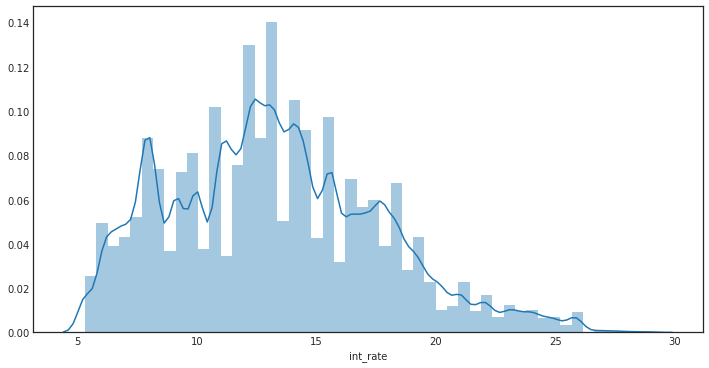

In [55]:
sns.distplot(df_loan['int_rate'],kde=True, rug=False)

Interest varies from 5.32 percent to 28.99 

#### How do the features correlate with each other?

In [160]:
from pandas.tools.plotting import scatter_matrix

In [54]:
df_loan_app.columns

Index(['id', 'member_id', 'term', 'int_rate', 'installment', 'grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'application_type', 'il_util',
       'all_util', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
numerical_features = ['annual']

In [ ]:
df_loan_app_num = df

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


KeyboardInterrupt: 

'01/09/2012'

### Check out how many members are in common between 2007-2015 and 2016 Q1

In [46]:
df_2016_q1 = pd.read_csv('../data/LoanStats_2016Q1.csv',low_memory=False)

Index(['Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)'], dtype='object')

In [ ]:
df_2016_q1[df_2016_q1['']]

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,18,46,54,111,122,123,124,127,128,129,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util',
       'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util',
       ...
       'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
       'total_rev_hi_lim', 'verification_status', 'verification_status_joint',
       'zip_code'],
      dtype='object', length=136)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524098 entries, 0 to 1524097
Data columns (total 136 columns):
id                                            21 non-null object
member_id                                     0 non-null float64
loan_amnt                                     1524077 non-null float64
funded_amnt                                   1524077 non-null float64
funded_amnt_inv                               1524077 non-null float64
term                                          1524077 non-null object
int_rate                                      1524077 non-null float64
installment                                   1524077 non-null float64
grade                                         1524077 non-null object
sub_grade                                     1524077 non-null object
emp_title                                     1430443 non-null object
emp_length                                    1524077 non-null object
home_ownership                                15240